In [7]:
%pip install sklearn
%pip install sqlite3


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Program Files\Python39\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-bd7nvksj\\sklearn\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-bd7nvksj\\sklearn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\user\AppData\Local\Temp\pip-pip-egg-info-4yegwfz6'
         cwd: C:\Users\user\AppData\Local\Temp\pip-install-bd7nvksj\sklearn\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is how to fix this error in the main use cases:
    - use 'pip install scikit-learn' rather than 'pip install sklearn'
    - replace 'sklearn' by 'scikit-learn' in your pip requireme


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


^C
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Program Files\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "c:\Program Files\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\Program Files\Python39\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "c:\Program Files\Python39\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "c:\Program Files\Python39\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "c:\Program Files\Python39\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\Program Files\Python39\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "c:\Program Files\Python39\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buf

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize

In [2]:
data = pd.read_csv("train_clnd1.csv")  
valid = pd.read_csv("valid_clnd_2.csv") 

ПОСТРОЕНИЕ ТЕСТОВОЙ МОДЕЛИ

ПЕРЕМЕННЫЕ

In [3]:
train_df = pd.read_csv("train_clnd1.csv")
valid_df = pd.read_csv("valid_clnd_2.csv")

In [6]:
X_train = train_df.drop(columns=["target"])
Y_train = train_df["target"]

X_val = valid_df.drop(columns=["target"])
Y_val = valid_df["target"]





In [7]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
Y_pred = model.predict(X_val)

In [12]:
from sklearn.metrics import accuracy_score, classification_report

Y_pred = model.predict(X_val)

try:
    accuracy = accuracy_score(Y_val, Y_pred)
    print(f"Validation Accuracy: {accuracy:.2f}")
    print("Classification Report on Validation Data:")
    print(classification_report(Y_val, Y_pred))
except ValueError as e:
    print(f"Ошибка при вычислении метрики: {e}")


Validation Accuracy: 0.98
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       1.00      0.03      0.06        66

    accuracy                           0.98      3642
   macro avg       0.99      0.52      0.52      3642
weighted avg       0.98      0.98      0.97      3642



ПОСТРОЕНИЕ И ОТОБРАЖЕНИЕ ГРАФИКА

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

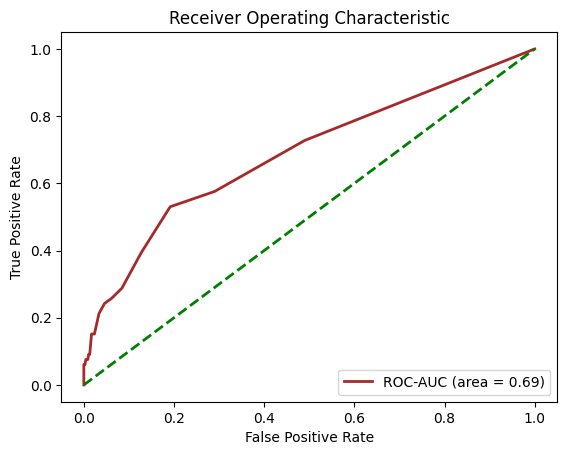

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

Y_pred = model.predict(X_val)
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, Y_train)

try:
    Y_prob = model.predict_proba(X_val)[:, 1] # Получение вероятностей для класса 1
    
    # ВАЖНО: Проверка на корректный размер Y_prob и Y_val. Если Y_prob имеет неправильный размер, это может привести к ошибке
    if Y_prob.shape[0] != len(Y_val):
        raise ValueError("Несоответствие размеров Y_prob и Y_val.")

    fpr, tpr, thresholds = roc_curve(Y_val, Y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color="brown", lw=2, label=f"ROC-AUC (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="green", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc='lower right')
    plt.show()

except ValueError as e:
    print(f"Ошибка при вычислении ROC-AUC: {e}")
except AttributeError as e:
    print(f"Ошибка доступа к атрибуту модели: {e}")
except Exception as e:
    print(f"Неожиданная ошибка: {e}")



ПРОБА ИНОЙ МОДЕЛИ

ПОСТРОЕНИЕ

ПЕРЕМЕННЫЕ ВСЁ ТЕ ЖЕ

In [4]:
X_train = train_df.drop(columns=["target"])
Y_train = train_df["target"]

X_val = valid_df.drop(columns=["target"])
Y_val = valid_df["target"]

In [5]:
def testing_model(model, X_val, Y_val, model_name):
    Y_pred = model.predict(X_val)
    Y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_val)

    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy_score(Y_val, Y_pred):.4f}")
    print(classification_report(Y_val, Y_pred))
    fpr, tpr, _ = roc_curve(Y_val, Y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color="brown", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="green", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver Operating Characteristic - {model_name}")
    plt.legend(loc="lower right")
    plt.show()


Logistic Regression
Accuracy: 0.6000
              precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       0.80      0.36      0.50        11

    accuracy                           0.60        20
   macro avg       0.67      0.63      0.58        20
weighted avg       0.68      0.60      0.57        20

Confusion Matrix:
[[8 1]
 [7 4]]


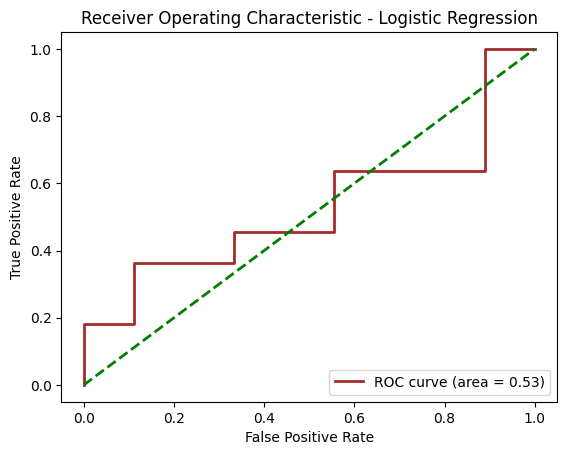


Random Forest
Accuracy: 0.6500
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.75      0.55      0.63        11

    accuracy                           0.65        20
   macro avg       0.67      0.66      0.65        20
weighted avg       0.68      0.65      0.65        20

Confusion Matrix:
[[7 2]
 [5 6]]


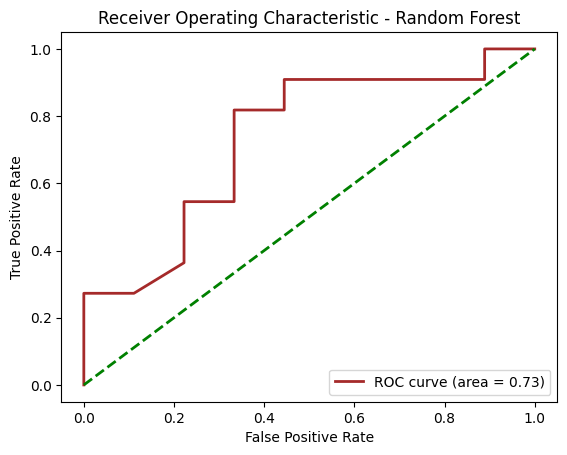


Support Vector Machine
Accuracy: 0.4500
              precision    recall  f1-score   support

           0       0.44      0.89      0.59         9
           1       0.50      0.09      0.15        11

    accuracy                           0.45        20
   macro avg       0.47      0.49      0.37        20
weighted avg       0.47      0.45      0.35        20

Confusion Matrix:
[[ 8  1]
 [10  1]]


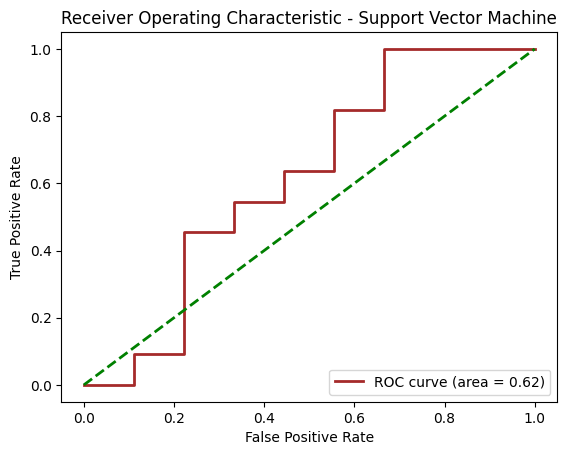


Gradient Boosting
Accuracy: 0.4500
              precision    recall  f1-score   support

           0       0.43      0.67      0.52         9
           1       0.50      0.27      0.35        11

    accuracy                           0.45        20
   macro avg       0.46      0.47      0.44        20
weighted avg       0.47      0.45      0.43        20

Confusion Matrix:
[[6 3]
 [8 3]]


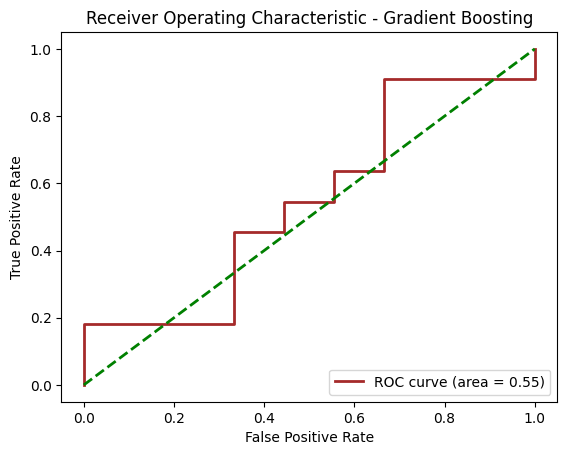

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)


def testing_model(model, X_train, X_val, Y_train, Y_val, model_name):
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('model', model)
    ])

    try:
        pipeline.fit(X_train, Y_train)
        Y_pred = pipeline.predict(X_val)
        Y_prob = pipeline.predict_proba(X_val)[:, 1] if hasattr(pipeline, "predict_proba") else pipeline.decision_function(X_val)

        print(f"\n{model_name}")
        print(f"Accuracy: {accuracy_score(Y_val, Y_pred):.4f}")
        print(classification_report(Y_val, Y_pred))
        cm = confusion_matrix(Y_val, Y_pred)
        print(f"Confusion Matrix:\n{cm}")
        fpr, tpr, _ = roc_curve(Y_val, Y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color="brown", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="green", lw=2, linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"Receiver Operating Characteristic - {model_name}")
        plt.legend(loc="lower right")
        plt.show()

    except ValueError as e:
        print(f"Error training {model_name}: {e}")



# Example Usage:
X = np.random.rand(100, 5)
X[np.random.choice(100, 15, replace=False), np.random.choice(5, 15, replace=True)] = np.nan
Y = np.random.randint(0, 2, 100) #Binary classification
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(random_state=42)
model_svm = SVC(probability=True) #probability=True is needed for predict_proba
model_gb = GradientBoostingClassifier(random_state=42)

testing_model(model_lr, X_train, X_val, y_train, y_val, "Logistic Regression")
testing_model(model_rf, X_train, X_val, y_train, y_val, "Random Forest")
testing_model(model_svm, X_train, X_val, y_train, y_val, "Support Vector Machine")
testing_model(model_gb, X_train, X_val, y_train, y_val, "Gradient Boosting")
